In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [4]:
df.shape

(9134, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
# Getting the total numbers of customers who have responded
df.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

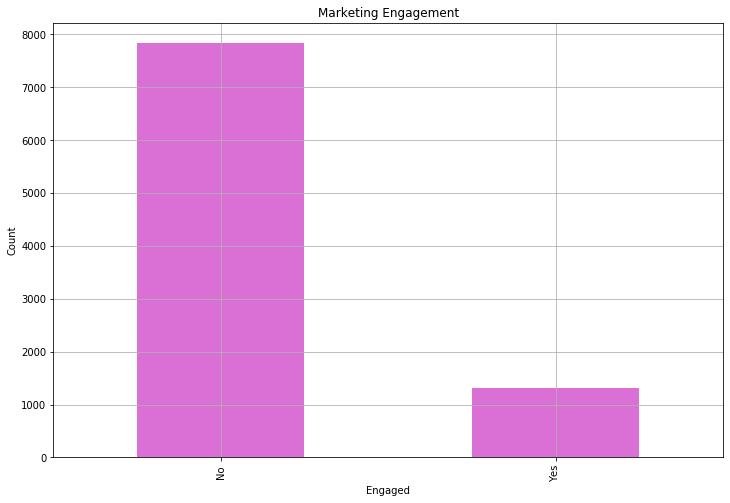

In [9]:
# Visualizing it in a bar chart
ax = df.groupby('Response').count()['Customer'].plot(
    kind='bar',
    color='orchid',
    grid=True,
    figsize=(12,8),
    title='Marketing Engagement'
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Count')

plt.show()

In [10]:
# Total row count for the column - Customer
df.shape[0] 

9134

In [11]:
# Calculating % of engaged and non-engaged users
df.groupby('Response').count()['Customer']/df.shape[0]

# Observation - From below output we can see that only 14% of the customers responded to marketing calls

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

In [12]:
# Now let's look at the Renew offer type column of the data set. 
# To find out what type of offer worked best for the customers

by_offer_type_df = df.loc[df['Response'] == 'Yes', #count only engaged customers
].groupby(['Renew Offer Type']                    #engaged customer grouped by renewal offer type
         ).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']

by_offer_type_df


Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

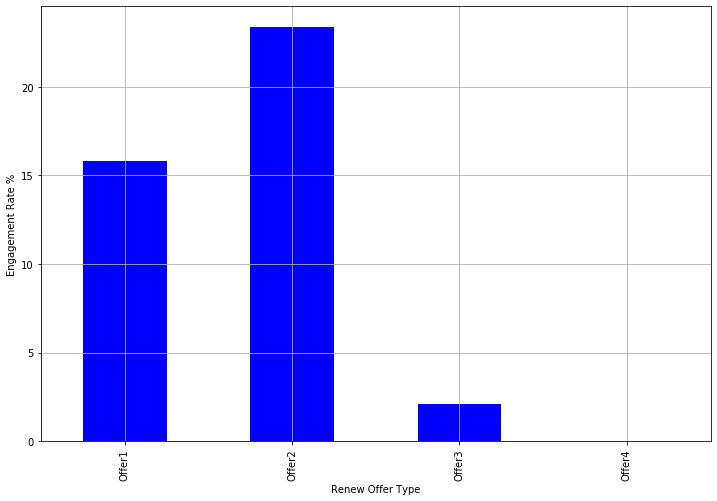

In [13]:
# Visualizing it in a bar plot
ax = (by_offer_type_df*100.0).plot(
    kind='bar',
    figsize=(12,8),
    color='blue',
    grid=True
)

ax.set_ylabel('Engagement Rate %')

plt.show()

# Obeservation - We can see that Offer Type 2 has the highest engagement rate

In [14]:
'''
We are going to understand how customers with different attributes respond differently to different marketing messages. 
We start looking at the engagements rates by each offer type and vehicle class.
'''

by_offer_type_df = df.loc[
df['Response'] == 'Yes' # engaged customers
].groupby([
'Renew Offer Type', 'Vehicle Class' # grouping the data by these two columns
]).count()['Customer'] / df.groupby('Renew Offer Type').count()['Customer']

by_offer_type_df

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [15]:
# Using unstack function to make it more readable
by_offer_type_df = by_offer_type_df.unstack().fillna(0)
by_offer_type_df

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


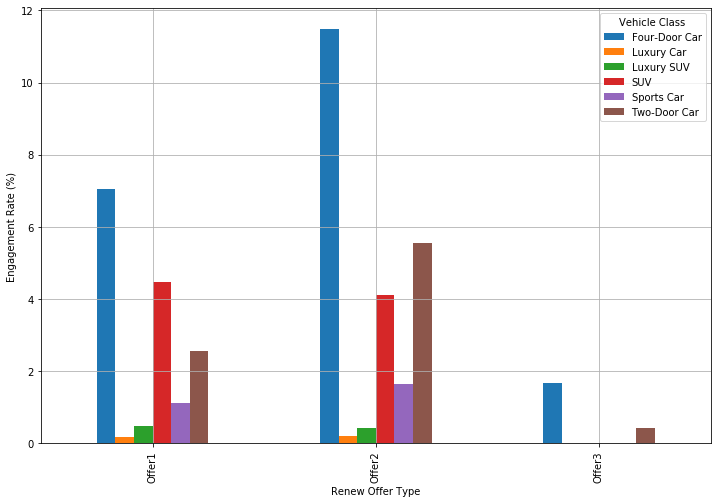

In [16]:
# Visualizing this data in bar plot
ax = (by_offer_type_df*100.0).plot(
    kind='bar',
    figsize=(12, 8),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')
plt.show()

In [18]:
'''
Observation - We already knew that “Engagement Rates by Offer Type” - Offer2 had the highest response rate among customers. 
Now we can add more insights by having broken down the customer attributes with the category “Vehicle class”:
- we can notice that customers with Four-Door Car respond more frequentlyfor all offer types and 
that those with “Luxury SUV” respond with a higher chance to Offer1 than to Offer2.
- If we have significantly difference in the response rates among different customer rates, 
we can fine-tune who to target for different set of offers.
'''

# Analyzing engagement rates by different sales channel

by_sales_channel_df = df.loc[
    df['Response'] == 'Yes'
    ].groupby([
        'Sales Channel'
    ]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

by_sales_channel_df

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

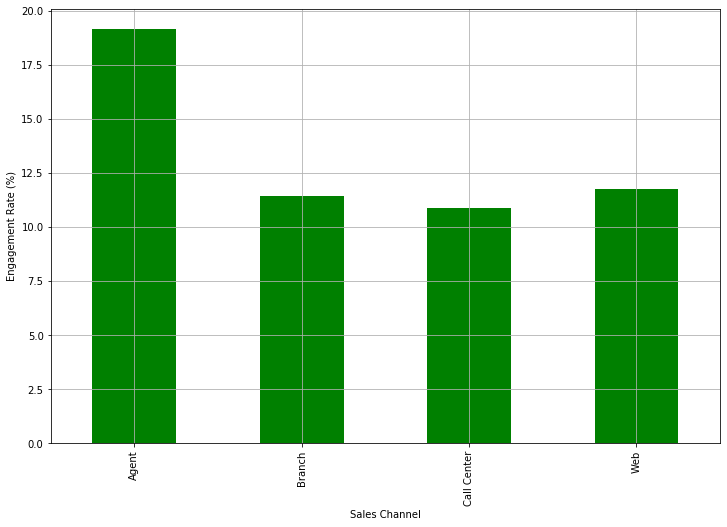

In [19]:
#visualizing this data in bar plot

ax = (by_sales_channel_df*100.0).plot(
    kind='bar',
    figsize=(12, 8), 
    color='green', 
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')
plt.show()

'''
Observation - As we can notice, Agent works better in term of getting responses from the customers, and then sales through 
Web works the second best. Let’s go ahead in breaking down this result deeper with different customers’ attributes
'''

In [8]:
# Checking whether different customer with various vehicle sizes respond diffrently to different sales channel

by_sales_channel_df = df.loc[
             df['Response'] == 'Yes'
         ].groupby([
             'Sales Channel', 'Vehicle Size'
         ]).count()['Customer'] / df.groupby('Sales Channel').count()['Customer']

by_sales_channel_df

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [9]:
by_sales_channel_df = by_sales_channel_df.unstack().fillna(0)
by_sales_channel_df

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


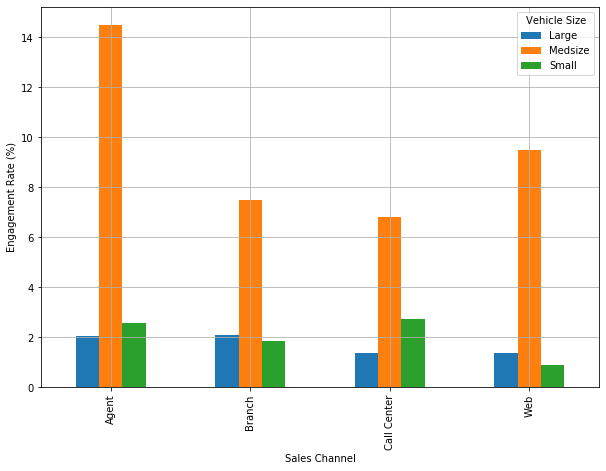

In [10]:
# Visualizing it itno a bar plot

ax = (by_sales_channel_df*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True )

ax.set_ylabel('Engagement Rate (%)')
plt.show()

'''
Observation - As we can see, customers with medium size vehicles respond the best to all sales channels whereas the other 
customers differs slightly in terms of engagement rates across different sales channels.
'''

In [11]:
# Calculating engagement rates by Months since Policy Inception

by_months_since_inception_df = df.loc[
             df['Response'] == 'Yes'
         ].groupby(
             by='Months Since Policy Inception'
         )['Response'].count() / df.groupby(
             by='Months Since Policy Inception'
         )['Response'].count() * 100.0

by_months_since_inception_df.head(10)

Months Since Policy Inception
0    14.457831
1    14.117647
2    20.224719
3    26.315789
4    19.780220
5     6.896552
6          NaN
7     7.594937
8     7.407407
9    18.750000
Name: Response, dtype: float64

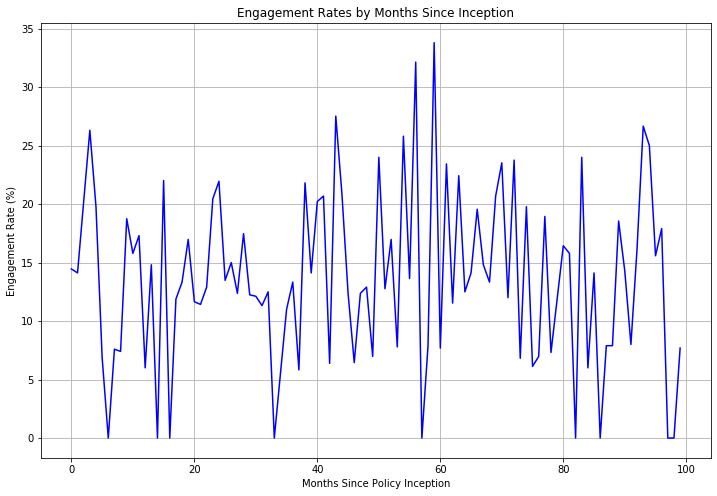

In [13]:
ax = by_months_since_inception_df.fillna(0).plot(
             figsize=(12, 8),
title='Engagement Rates by Months Since Inception', grid=True,
color='blue'
         )

ax.set_xlabel('Months Since Policy Inception')
ax.set_ylabel('Engagement Rate (%)')
plt.show()

In [19]:
'''
We are going to segment our customer base by Customer Lifetime Value and Months Since Policy Inception.
'''

print(df['Customer Lifetime Value'].describe())
print('\nMedian value is: ',df['Customer Lifetime Value'].median())

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

Median value is:  5780.182197


In [20]:
'''
For the previous output, we are going to define those customers with a CLV higher than the median as high-CLV customers, 
and those with a CLV lower than the median as low-CLV customers.
'''

df['CLV Segment'] = df['Customer Lifetime Value'].apply(
lambda x: 'High' if x > df['Customer Lifetime Value'].median() else 'Low'
)

In [21]:
#doing the same for Months Since Policy Inception 

df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

In [22]:
df['Policy Age Segment'] = df['Months Since Policy Inception'].apply(
lambda x: 'High' if x > df['Months Since Policy Inception'].median() else 'Low'
)

In [23]:
df.head(2)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV Segment,Policy Age Segment
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Low,Low
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,High,Low


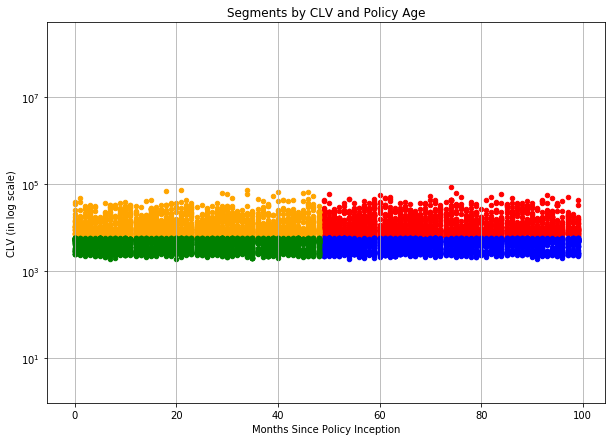

In [24]:
#Visualizing these segments
ax = df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
x='Months Since Policy Inception', y='Customer Lifetime Value', logy=True,
color='red'
)
df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
    ax=ax,
x='Months Since Policy Inception', y='Customer Lifetime Value', logy=True,
color='blue'
)
df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
x='Months Since Policy Inception', y='Customer Lifetime Value', logy=True,
color='orange'
)
df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
x='Months Since Policy Inception',
    y='Customer Lifetime Value', 
    logy=True,
    color='green',
    grid=True,
    figsize=(10, 7)
)

ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')
ax.set_title('Segments by CLV and Policy Age')
plt.show()

In [25]:
'''
logy=True transform the scale to log scale and it is often used for monetary values as they often have high skewness 
in their values. We have repeated the code for the plot.scatter 4 times because we have created 4 segments.
'''

#checking if there is a noticable difference 

engagement_rates_by_segment_df = df.loc[
             df['Response'] == 'Yes'
].groupby([
     'CLV Segment', 'Policy Age Segment'
]). count()['Customer'] / df.groupby([
    'CLV Segment', 'Policy Age Segment'
]).count()['Customer']
    
engagement_rates_by_segment_df

CLV Segment  Policy Age Segment
High         High                  0.138728
             Low                   0.132067
Low          High                  0.162450
             Low                   0.139957
Name: Customer, dtype: float64

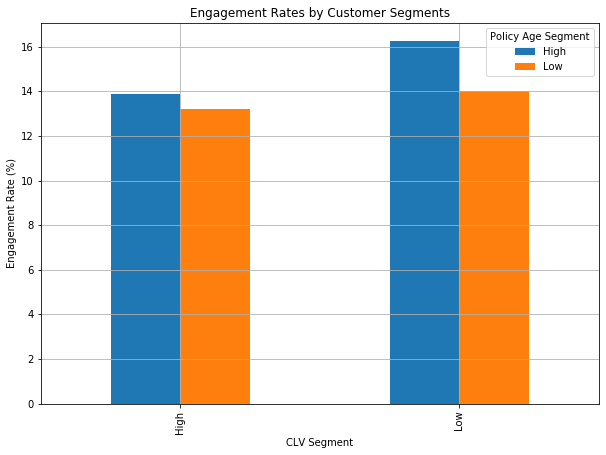

In [26]:
#Using a char to visualize the difference

ax = (engagement_rates_by_segment_df.unstack()*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True 
)

ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rates by Customer Segments')
plt.show()

'''
As we can notice, High Policy Age Segment has higher engagement than the Low Policy Age Segment. 
This suggests that those customers who have been insured by this company longer re- spond better. Moreover, the High 
Policy Age and Low CLV segment has the highest engagement rate among the four segments.By creating different customer 
segments based on customer attributes, we can better under- stand how different groups of customers behave differently, 
and consequently, use this informa- tion to customize the marketing messagges
'''

In [29]:
df.Response = df.Response.apply(lambda X : 0 if X == 'No' else 1)
continous_var_df = df.select_dtypes(include=['int64','float'])
continous_var_df.nunique()

Customer Lifetime Value          8041
Response                            2
Income                           5694
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Total Claim Amount               5106
dtype: int64

In [30]:
continous_var_df.head(2)

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,0,56274,69,32,5,0,1,384.811147
1,6979.535903,0,0,94,13,42,0,8,1131.464935


In [31]:
import seaborn as sns  # Provides a high level interface for drawing attractive and informative statistical graphics
sns.set()

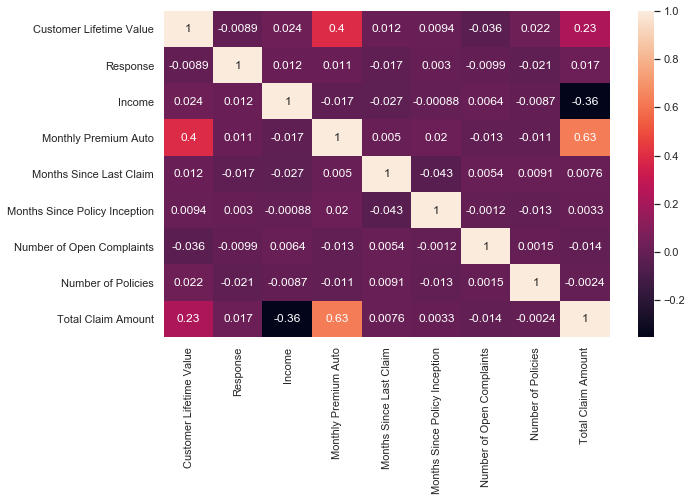

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(continous_var_df.corr(), annot = True)
plt.show()